In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Datasets/Churn_Modelling_Dataset.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Dividing the dataset into independent variables(features) and dependent variables(labels)


In [35]:
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]
print(X.shape,y.shape)

(10000, 10) (10000,)


In [36]:
#Feature Enginneering[Removing or duplicating or creating dummies for certain features]

In [37]:
pd.get_dummies(X['Geography'])

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,1,0,0
9998,0,1,0


In [41]:
dataset['Geography'].head

<bound method NDFrame.head of 0        France
1         Spain
2        France
3        France
4         Spain
         ...   
9995     France
9996     France
9997     France
9998    Germany
9999     France
Name: Geography, Length: 10000, dtype: object>

This column of geography had words which are now converted into (0,1), since words were repeated like France, Spain, Germany. 
So now it will become just like 0s and 1s. As we can see even if we remove France from the column still we can figure out that is was France from the rest.

In [5]:
geography = pd.get_dummies(X['Geography'], drop_first=True)
gender = pd.get_dummies(X['Gender'], drop_first=True)


In [6]:
X = X.drop(['Geography', 'Gender'], axis = 1)

In [7]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [8]:
X = pd.concat([X, geography, gender], axis = 1)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [11]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [12]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
7389,667,34,5,0.00,2,1,0,163830.64,0,1,0
9275,427,42,1,75681.52,1,1,1,57098.00,1,0,1
2995,535,29,2,112367.34,1,1,0,185630.76,0,0,0
5316,654,40,5,105683.63,1,1,0,173617.09,0,1,1
356,850,57,8,126776.30,2,1,1,132298.49,0,1,0


In [13]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [15]:
#ANN Creation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , LeakyReLU,PReLU, ReLU,ELU, Dropout

#Lets initialize ANN
classifier = Sequential()
#Adding input layer
classifier.add(Dense(11, activation = 'relu'))
#Adding Hidden Layer 1
classifier.add(Dense(10, activation = 'relu'))
#Adding Hidden Layer 2
classifier.add(Dense(20, activation = 'relu'))
#Adding Hidden Layer 3
classifier.add(Dense(10, activation = 'relu'))
#Finally adding Output Layer
classifier.add(Dense(1, activation = 'sigmoid'))

In [16]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])



In [17]:
opt = tf.keras.optimizers.Adam(learning_rate =0.015)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = "val_loss",
                                                 min_delta = 0.0001, patience = 20,
                                                 verbose = 1,
                                                 mode = "auto",
                                                 baseline = None,
                                                 restore_best_weights = False)

In [18]:
model = classifier.fit(X_train,y_train, 
                       validation_split = 0.33, batch_size = 10,
                       epochs = 100, callbacks = early_stopping)
model.history.keys()

Epoch 1/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4660 - accuracy: 0.7906 - val_loss: 0.4331 - val_accuracy: 0.8118
Epoch 2/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4163 - accuracy: 0.8224 - val_loss: 0.4238 - val_accuracy: 0.8152
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4065 - accuracy: 0.8298 - val_loss: 0.4173 - val_accuracy: 0.8175
Epoch 4/100
536/536 [==============================] - 1s 3ms/step - loss: 0.3988 - accuracy: 0.8321 - val_loss: 0.4107 - val_accuracy: 0.8228
Epoch 5/100
536/536 [==============================] - 1s 3ms/step - loss: 0.3903 - accuracy: 0.8371 - val_loss: 0.4020 - val_accuracy: 0.8311
Epoch 6/100
536/536 [==============================] - 1s 3ms/step - loss: 0.3779 - accuracy: 0.8423 - val_loss: 0.3900 - val_accuracy: 0.8338
Epoch 7/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3597 - accuracy: 0.8543 - val_loss: 0.3795 - val_accuracy: 0.8417

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

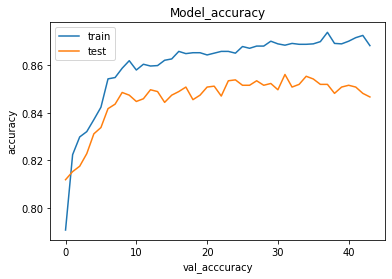

In [25]:
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('Model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('val_acccuracy')
plt.legend(['train', 'test', loc := 'upper left'])
plt.show()

In [26]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred>=0.5)

63/63 [==============================] - 0s 1ms/step


In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [32]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)

In [34]:
classifier.get_weights()

[array([[ 0.08131611, -0.1833752 ,  0.17763774, -0.0058143 ,  0.01809561,
          0.09344161,  0.18651819, -0.08339238, -0.03837003,  0.0191746 ,
          0.5550038 ],
        [-0.36027744, -0.01981182, -0.03693816,  0.44921368, -0.45941618,
         -0.31605652, -0.41741446,  0.8352681 ,  0.46019307, -0.31652576,
         -0.8216225 ],
        [ 0.13801925,  0.31221873,  0.29896057,  0.00894143,  0.32186788,
          0.28219   , -0.01136732,  0.00546437,  0.2426109 , -0.39293322,
          0.09381399],
        [-0.26914528, -0.63459224, -0.09077109, -0.19642627,  0.10192839,
         -0.4544843 , -1.0587543 , -0.2906575 , -0.39304414,  0.0218993 ,
          0.282205  ],
        [-0.30898973,  0.06962547,  1.0578946 , -0.22113499, -0.28558236,
         -0.50983167, -0.08915114, -0.7594291 ,  0.5080533 , -0.120455  ,
         -0.32319093],
        [-0.1928204 ,  0.16542177,  0.01233813, -0.07102631, -0.08676959,
         -0.2466833 , -0.02671329, -0.05303444,  0.27793145,  0.4004921